In [36]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
import os

# Specify the new folder location with double backslashes
new_folder_path = 'C:\\Users\\User\\Desktop\\\A'

for dirname, _, filenames in os.walk(new_folder_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)  # Print or process the file path

C:\Users\User\Desktop\\A\CnnWithAug60.keras
C:\Users\User\Desktop\\A\Benign\WBC-Benign-001.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-002.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-003.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-004.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-005.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-006.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-007.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-008.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-009.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-010.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-011.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-012.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-013.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-014.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-015.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-016.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-017.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Benign-018.jpg
C:\Users\User\Desktop\\A\Benign\WBC-Be

In [38]:
%pip install pandas numpy matplotlib scikit-learn tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [39]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
# print("Keras version:", keras.__version__)

TensorFlow version: 2.16.1


In [40]:
%pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.metrics import classification_report
from tensorflow.keras.applications.vgg19 import VGG19
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, LearningRateScheduler
from tensorflow.keras.applications.vgg19 import VGG19

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from keras import backend as K

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [42]:
import os
import pandas as pd

Benign_dir = [ r'C:\\Users\\User\\Desktop\\\A\\Benign']

Malignant_Pre = [
    r'C:\\Users\\User\\Desktop\\\A\\Pre'
]

Malignant_Pro = [
    r'C:\\Users\\User\\Desktop\\\A\\\Pro'
]

Malignant_early = [
    r'C:\\Users\\User\\Desktop\\\A\\Early'
]

filepaths = []
labels = []
dict_lists = [Benign_dir, Malignant_Pre,Malignant_Pro, Malignant_early]
class_labels = ['Benign', 'Malignant_Pre', 'Malignant_Pro', 'Malignant_early']

for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        flist = os.listdir(j)
        for f in flist:
            fpath = os.path.join(j, f)
            filepaths.append(fpath)
            labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
bloodCell_data = pd.concat([Fseries, Lseries], axis=1)
bloodCell_df = pd.DataFrame(bloodCell_data)
print(bloodCell_df.head())
print(bloodCell_df["labels"].value_counts())

                                           filepaths  labels
0  C:\\Users\\User\\Desktop\\\A\\Benign\WBC-Benig...  Benign
1  C:\\Users\\User\\Desktop\\\A\\Benign\WBC-Benig...  Benign
2  C:\\Users\\User\\Desktop\\\A\\Benign\WBC-Benig...  Benign
3  C:\\Users\\User\\Desktop\\\A\\Benign\WBC-Benig...  Benign
4  C:\\Users\\User\\Desktop\\\A\\Benign\WBC-Benig...  Benign
labels
Malignant_early    985
Malignant_Pre      963
Malignant_Pro      804
Benign             504
Name: count, dtype: int64


In [43]:
bloodCell_df.shape

(3256, 2)

In [44]:
train_images, test_images = train_test_split(bloodCell_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(bloodCell_df, test_size=0.2, random_state=42)

In [45]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(2604, 2)
(977, 2)
(652, 2)
(2279, 2)


In [46]:
import tensorflow as tf

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

train = image_gen.flow_from_dataframe(
    dataframe=train_set, x_col="filepaths", y_col="labels",
    target_size=(299, 299), color_mode='rgb',
    class_mode="categorical", batch_size=32, shuffle=True
)

val = image_gen.flow_from_dataframe(
    dataframe=val_set, x_col="filepaths", y_col="labels",
    target_size=(299, 299), color_mode='rgb',
    class_mode="categorical", batch_size=32, shuffle=False
)

test = image_gen.flow_from_dataframe(
    dataframe=test_images, x_col="filepaths", y_col="labels",
    target_size=(299, 299), color_mode='rgb',
    class_mode="categorical", batch_size=32, shuffle=False
)

Found 2604 validated image filenames belonging to 4 classes.
Found 652 validated image filenames belonging to 4 classes.
Found 977 validated image filenames belonging to 4 classes.


In [48]:
classes=list(train.class_indices.keys())
print (classes)

['Benign', 'Malignant_Pre', 'Malignant_Pro', 'Malignant_early']


In [49]:
%pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


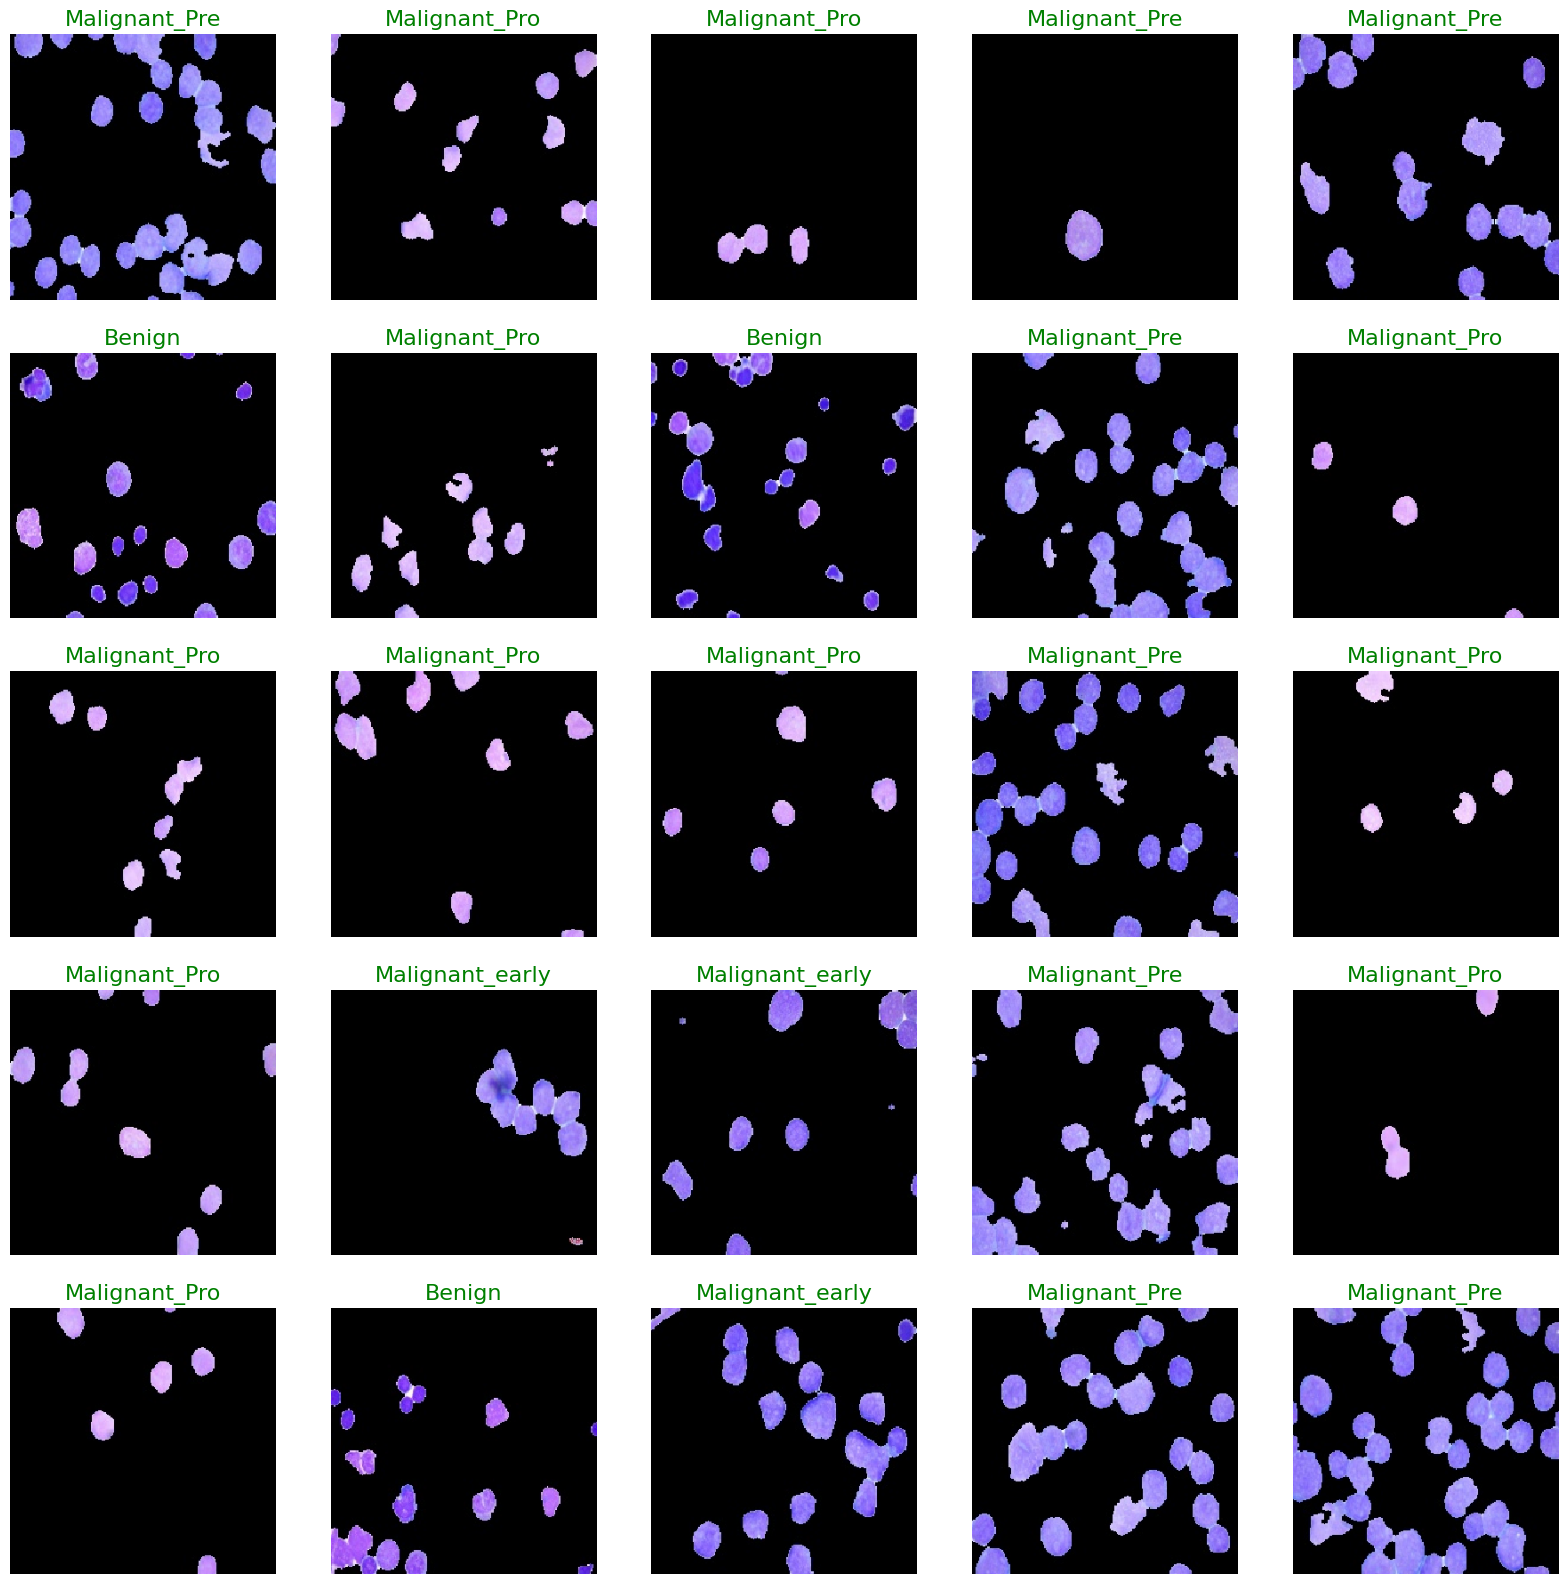

In [50]:
def show_Blood_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()
show_Blood_images(train)

In [52]:
!pip install matplotlib tensorflow pandas

In [53]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam

# Load the InceptionV3 model with top layers included
model = InceptionV3(weights='imagenet', include_top=True, input_shape=(299, 299, 3))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 73, 73,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [54]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the InceptionV3 model without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add global average pooling layer and final dense layer with softmax activation
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
predictions = Dense(4, activation='softmax')(x)  # Output layer with 4 units (for 4 classes)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Assuming `train` and `val` are your training and validation datasets
history = model.fit(train, epochs=40, validation_data=val, verbose=1)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_282 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_282[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_282      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_283 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_282[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_283[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_283      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_284 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_283[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_284[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_284      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 73, 73,    │          0 │ activation_284[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_285 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_12… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_285[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_285      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_286 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_285[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_286[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_286      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,810,980 (83.20 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.3407 - loss: 1.3925 - val_accuracy: 0.3957 - val_loss: 1.3404
Epoch 2/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4125 - loss: 1.3209 - val_accuracy: 0.4601 - val_loss: 1.2927
Epoch 3/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4544 - loss: 1.2726 - val_accuracy: 0.4847 - val_loss: 1.2500
Epoch 4/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4634 - loss: 1.2389 - val_accuracy: 0.5061 - val_loss: 1.2101
Epoch 5/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.5211 - loss: 1.1770 - val_accuracy: 0.5215 - val_loss: 1.1736
Epoch 6/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.5347 - loss: 1.1458 - val_accuracy: 0.5383 - val_loss: 1.1411
Epoch 7/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5439 - loss: 1.1183 - val_accuracy: 0.5460 - val_loss: 1.1101
Epoch 8/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.5528 - loss: 1.0870 - val_accuracy: 0.5660 - v

In [55]:
loss, accuracy = model.evaluate(test, verbose=1)
print(f"Test accuracy: {accuracy}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7844 - loss: 0.6739
Test accuracy: 0.775844395160675


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


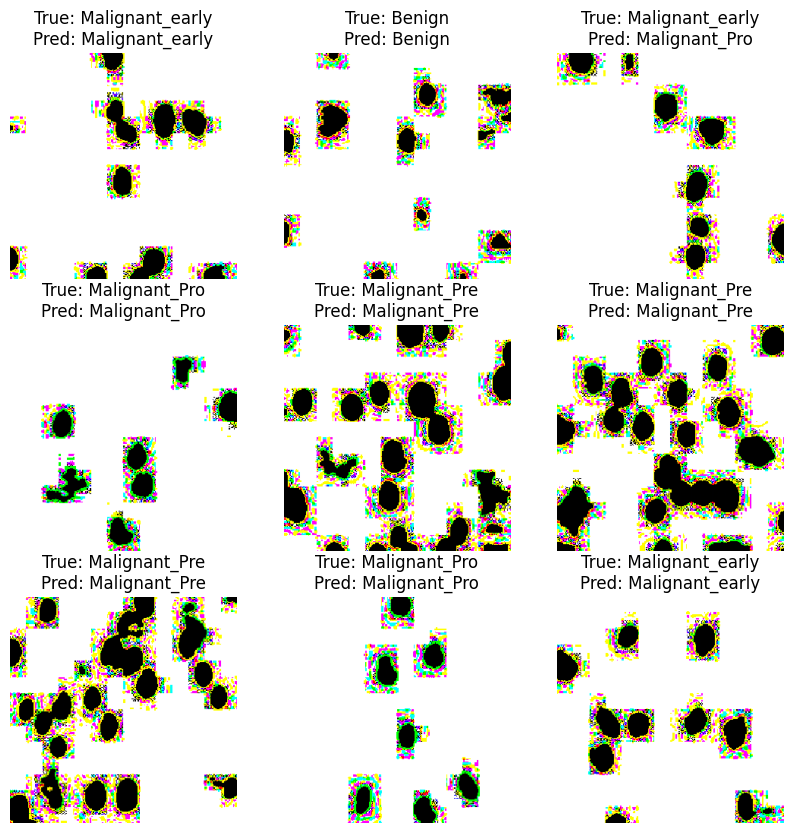

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels from the validation dataset
images, labels = next(iter(val))

# Predict the labels for these images
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

# Class names based on your dataset
class_names = list(train.class_indices.keys())

# Number of images to display
num_images = 9

plt.figure(figsize=(10, 10))
for i in range(num_images):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis("off")

plt.show()

In [61]:
model.evaluate(test, verbose=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7844 - loss: 0.6739


[0.6735529899597168, 0.775844395160675]

In [62]:
model.save("Blood CellI_InV3.h5")

In [63]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1)

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

31/31 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step


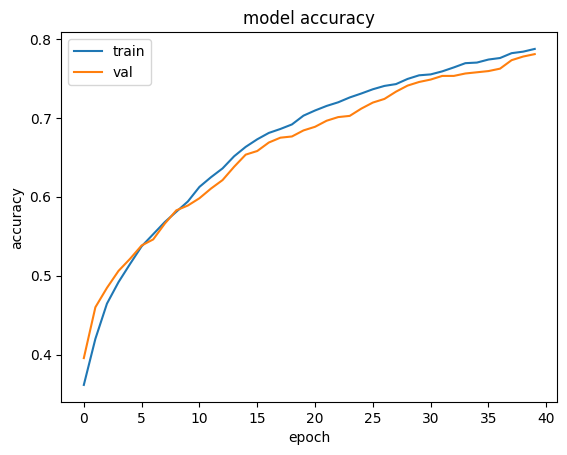

<Figure size 640x480 with 0 Axes>

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.savefig('model_accuracy.png')

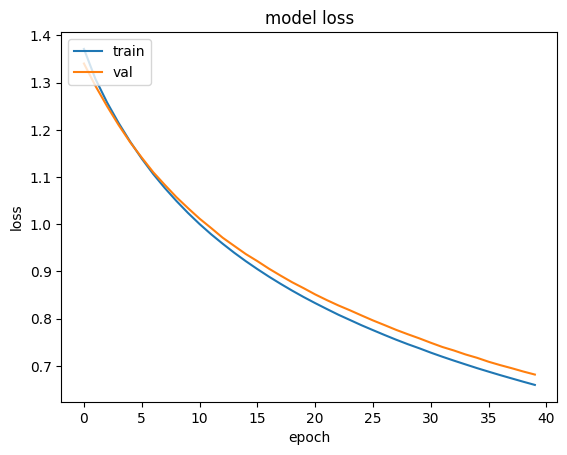

<Figure size 640x480 with 0 Axes>

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.savefig('model_loss.png')

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

                 precision    recall  f1-score   support

         Benign       0.84      0.41      0.55       171
  Malignant_Pre       0.90      0.84      0.87       288
  Malignant_Pro       0.71      0.88      0.79       226
Malignant_early       0.71      0.85      0.78       292

       accuracy                           0.78       977
      macro avg       0.79      0.74      0.75       977
   weighted avg       0.79      0.78      0.77       977

Accuracy of the Model: 77.6%


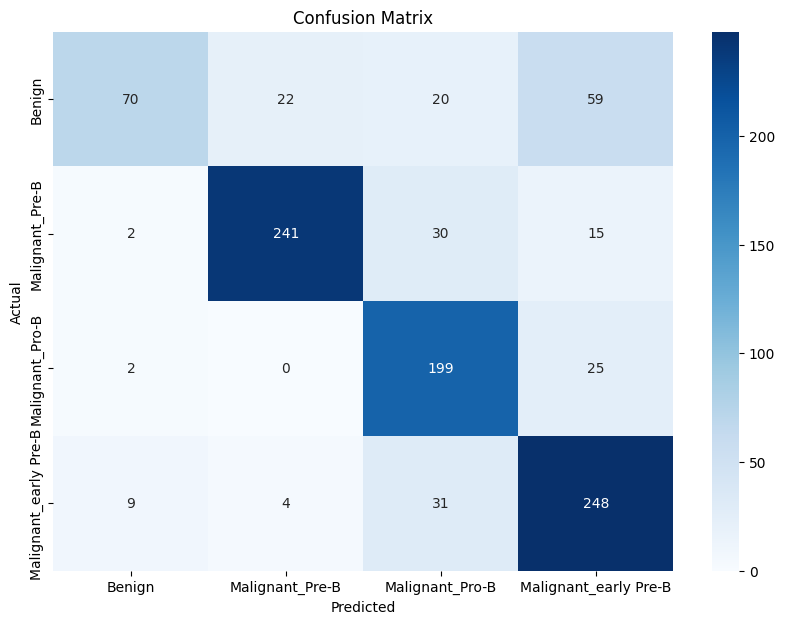

<Figure size 640x480 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_labels = ['Benign', 'Malignant_Pre-B', 'Malignant_Pro-B', 'Malignant_early Pre-B']


cm = confusion_matrix(y_test, pred2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()
plt.savefig('model_confusion_matrix.png')